In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = 'sales_train_validation.csv'
chunk = pd.read_csv(file_path, nrows=100000)

calender = pd.read_csv('calendar.csv')
prices = pd.read_csv('Sell_Prices.csv')

print(chunk.shape)
chunk.head()

(30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [3]:
cols = pd.read_csv(file_path, nrows=1).columns

id_cols =['id','item_id','dept_id','cat_id','store_id','state_id']
day_cols = cols[-365:]

use_cols = id_cols + day_cols.tolist()
df = pd.read_csv(file_path, usecols=use_cols)

print(df.shape)
df.head()

(30490, 371)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1549,d_1550,d_1551,d_1552,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,1,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,3,0,2,1,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2,1,2,...,2,1,1,0,1,1,2,2,2,4


In [4]:
df_long = df.melt(
    id_vars=id_cols,
    var_name='day',
    value_name='sales'
)

df_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1549,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1549,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1549,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1549,3
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1549,0


In [5]:
df_long['day_num'] = df_long['day'].str.replace('d_', '').astype(int)
start_date = pd.to_datetime('2011-01-29')
df_long['date'] = start_date + pd.to_timedelta(df_long['day_num'] - 1, unit='D')
df_long = df_long.drop(['day', 'day_num'], axis=1)
df_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,sales,date
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2015-04-26
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2015-04-26
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2015-04-26
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,3,2015-04-26
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2015-04-26


In [6]:
store_daily = df_long.groupby(['store_id', 'date'])['sales'].sum().reset_index()
store_daily.head()

,store_id,date,sales
0,CA_1,2015-04-26,5815
1,CA_1,2015-04-27,3995
2,CA_1,2015-04-28,3526
3,CA_1,2015-04-29,3560
4,CA_1,2015-04-30,3466


In [7]:
store_daily['dayofweek'] = store_daily['date'].dt.dayofweek
store_daily['month'] = store_daily['date'].dt.month
store_daily['year'] = store_daily['date'].dt.year
store_daily['week'] = store_daily['date'].dt.isocalendar().week

In [8]:
store_daily['lag_7'] = store_daily.groupby('store_id')['sales'].shift(7)
store_daily['lag_28'] = store_daily.groupby('store_id')['sales'].shift(28)
store_daily['rolling_mean_7'] = store_daily.groupby('store_id')['sales'].shift(7).rolling(7).mean()

In [9]:
store_daily = store_daily.dropna()

DATA MODELLING

In [10]:
features = [
    'dayofweek',
    'month',
    'year',
    'week',
    'lag_7',
    'lag_28',
    'rolling_mean_7'
]

target = 'sales'

TRAIN TEST SPLIT

In [11]:
train = store_daily[store_daily['date'] < '2016-01-01']
test = store_daily[store_daily['date'] >= '2016-01-01']

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

LIGHTGBM MODEL

In [12]:
# install lightgbm in the current Jupyter environment
%pip install lightgbm

import lightgbm as lg

Note: you may need to restart the kernel to use updated packages.


In [15]:
# use the imported alias 'lg', correct class name and instantiate
model = lg.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8
)

model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 2220, number of used features: 6
[LightGBM] [Info] Start training from score 3875.409910


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, n_estimators=1000,
              subsample=0.8)

In [16]:
pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test,pred))
print("RMSE:", rmse)

RMSE: 725.922357431123


In [19]:
import matplotlib.pyplot as plt

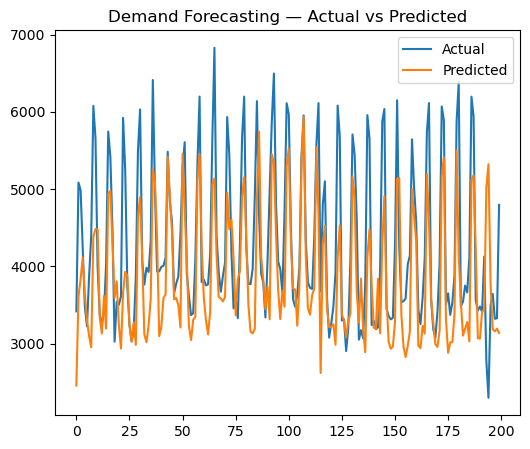

In [24]:
plt.figure(figsize = (6,5))
plt.plot(y_test.values[:200], label = 'Actual')
plt.plot(pred[:200], label = 'Predicted')

plt.legend()
plt.title('Demand Forecasting — Actual vs Predicted')
plt.show()

In [25]:
import joblib

In [26]:
joblib.dump(model, 'walmart_forecast_model.pkl')
joblib.dump(features, 'model_features.pkl')

['model_features.pkl']